##  Problem statement:
####    To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be
####    deadly if not detected early. It accounts for 75% of skin cancer deaths. 

In [1]:
# import libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

###### set environment variable to prevent dead kernel

In [2]:
%env  KMP_DUPLICATE_LIB_OK=True

env: KMP_DUPLICATE_LIB_OK=True


In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

In [5]:
batch_size = 32
img_height = 180
img_width = 180

###### Use 80% of the images for training, and 20% for validation.

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='training',
            )

Found 8789 files belonging to 9 classes.
Using 7032 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )

Found 8789 files belonging to 9 classes.
Using 1757 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

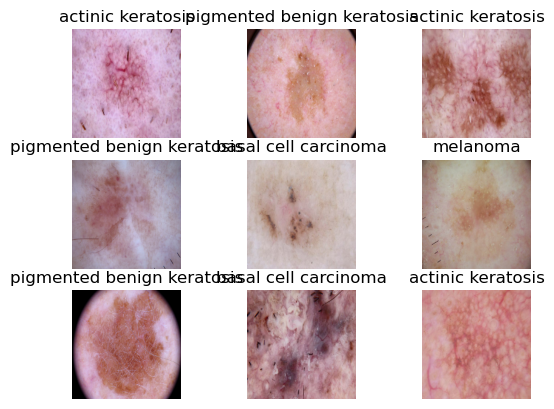

In [9]:
import matplotlib.pyplot as plt
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [11]:
### Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),    
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class)
])

### Compile the model

In [12]:
### Todo, choose an appropirate optimiser and loss function
#loss: Sparse Categorical Crossentropy Calculates the crossentropy loss between labels and predictions.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
220/220 [==============================] - 100s 340ms/step - loss: 1.4808 - accuracy: 0.4408 - val_loss: 1.3552 - val_accuracy: 0.4997
Epoch 2/20
220/220 [==============================] - 68s 310ms/step - loss: 1.1536 - accuracy: 0.5852 - val_loss: 1.0349 - val_accuracy: 0.6631
Epoch 3/20
220/220 [==============================] - 70s 316ms/step - loss: 0.9087 - accuracy: 0.6921 - val_loss: 0.9326 - val_accuracy: 0.6892
Epoch 4/20
220/220 [==============================] - 69s 311ms/step - loss: 0.7465 - accuracy: 0.7483 - val_loss: 0.7803 - val_accuracy: 0.7524
Epoch 5/20
220/220 [==============================] - 68s 308ms/step - loss: 0.5772 - accuracy: 0.8076 - val_loss: 0.6892 - val_accuracy: 0.8014
Epoch 6/20
220/220 [==============================] - 68s 311ms/step - loss: 0.4738 - accuracy: 0.8450 - val_loss: 0.7539 - val_accuracy: 0.7769
Epoch 7/20
220/220 [==============================] - 68s 310ms/step - loss: 0.3854 - accuracy: 0.8739 - val_loss: 0.5629 - val_a

### Visualizing training results

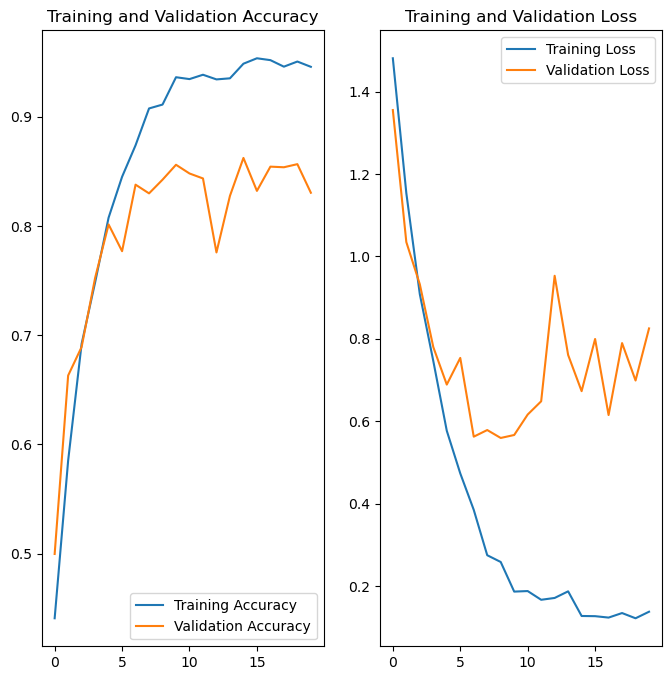

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:-
###### The above model is clearly the case of overfitting and the model doesn't seem to be learning anything from the dataset.
######   (1) Training accuracy is very high, while validation accuracy is around 50%.
######   (2) The loss on the training set decreases after each epoch, but in the case of the validation set, it climbs back again after the 5th epoch.

#### Instead of generalizing and learning real features and general relationships, the model memorized the data

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2,0.3), width_factor=(0.2,0.3))  
])

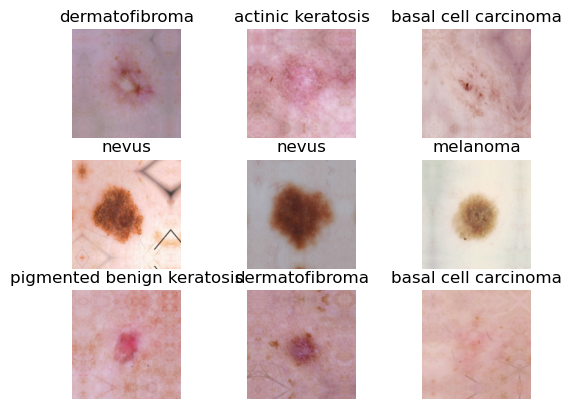

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## https://www.tensorflow.org/tutorials/images/data_augmentation
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
## Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

### Compiling the model

In [19]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) ## your training code

Epoch 1/20
220/220 [==============================] - 109s 450ms/step - loss: 1.5268 - accuracy: 0.4231 - val_loss: 1.3792 - val_accuracy: 0.4997
Epoch 2/20
220/220 [==============================] - 101s 460ms/step - loss: 1.3640 - accuracy: 0.5085 - val_loss: 1.3730 - val_accuracy: 0.5100
Epoch 3/20
220/220 [==============================] - 113s 515ms/step - loss: 1.2772 - accuracy: 0.5432 - val_loss: 1.2723 - val_accuracy: 0.5464
Epoch 4/20
220/220 [==============================] - 111s 507ms/step - loss: 1.1732 - accuracy: 0.5838 - val_loss: 1.1694 - val_accuracy: 0.5948
Epoch 5/20
220/220 [==============================] - 115s 524ms/step - loss: 1.1296 - accuracy: 0.6003 - val_loss: 1.1617 - val_accuracy: 0.6061
Epoch 6/20
220/220 [==============================] - 129s 585ms/step - loss: 1.0903 - accuracy: 0.6079 - val_loss: 1.0584 - val_accuracy: 0.6460
Epoch 7/20
220/220 [==============================] - 116s 527ms/step - loss: 1.0635 - accuracy: 0.6273 - val_loss: 1.1355 -

Epoch 11/20
220/220 [==============================] - 114s 519ms/step - loss: 0.8601 - accuracy: 0.7011 - val_loss: 0.9192 - val_accuracy: 0.6989
Epoch 12/20
220/220 [==============================] - 113s 513ms/step - loss: 0.8507 - accuracy: 0.7092 - val_loss: 0.9907 - val_accuracy: 0.6705
Epoch 13/20
220/220 [==============================] - 115s 522ms/step - loss: 0.8111 - accuracy: 0.7208 - val_loss: 0.8378 - val_accuracy: 0.7251
Epoch 14/20
220/220 [==============================] - 117s 530ms/step - loss: 0.7540 - accuracy: 0.7439 - val_loss: 0.8587 - val_accuracy: 0.7245
Epoch 15/20
220/220 [==============================] - 117s 531ms/step - loss: 0.7382 - accuracy: 0.7418 - val_loss: 0.8818 - val_accuracy: 0.7029
Epoch 16/20
220/220 [==============================] - 121s 549ms/step - loss: 0.7341 - accuracy: 0.7437 - val_loss: 0.8055 - val_accuracy: 0.7388
Epoch 17/20
220/220 [==============================] - 132s 599ms/step - loss: 0.7081 - accuracy: 0.7585 - val_loss: 0

### Visualizing the results

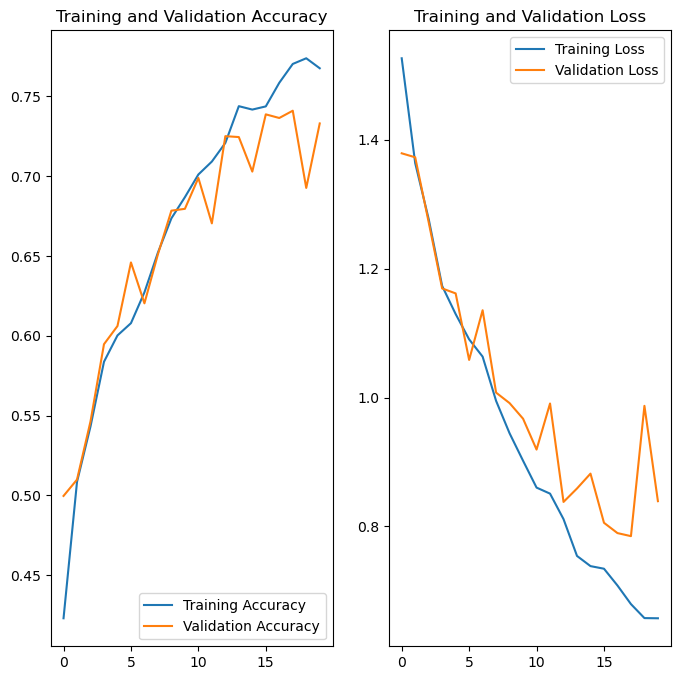

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:-
###### In the above model use of data augmentation and dropout layer reduced the problem of overfitting.

###### The accuracy of the model has greatly increased along with the synchronization of the verification accuracy.

###### The loss function is synchronously exhausted for the training and validation data.

In [25]:
path_list=[]
lesion_list=[]

#### Find the distribution of classes in the training dataset.


In [26]:
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

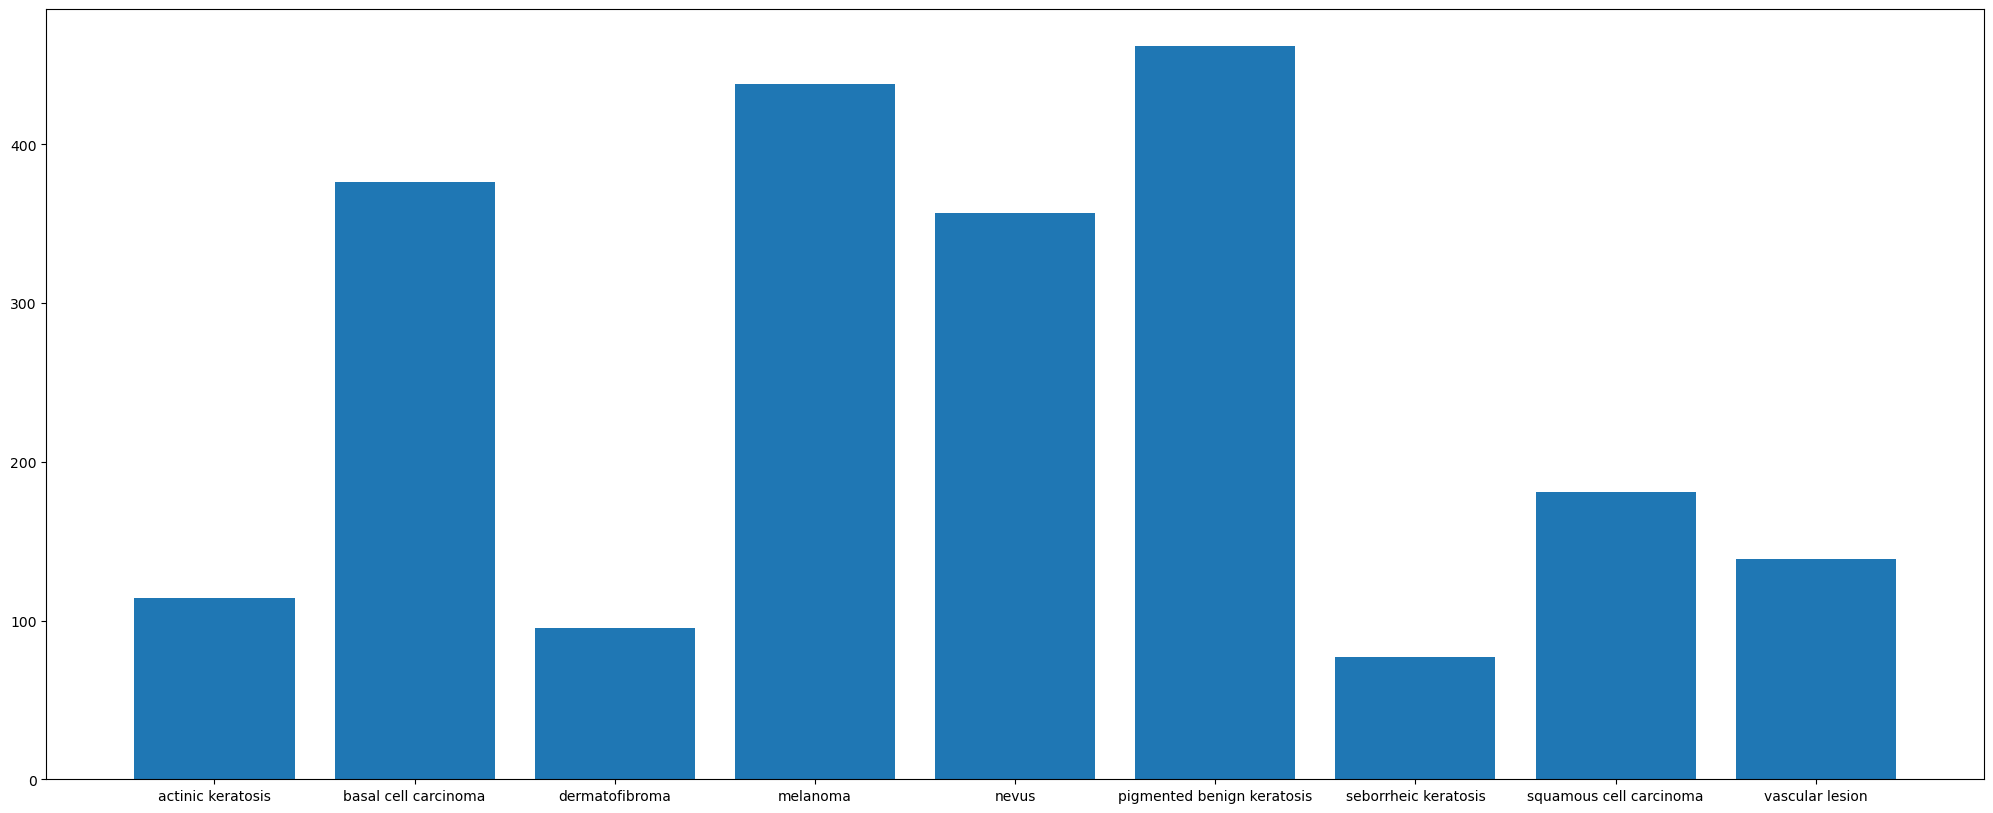

In [27]:
# glob('./Skin cancer ISIC The International Skin Imaging Collaboration/train/*/*')
# './Skin cancer ISIC The International Skin Imaging Collaboration/train\\actinic keratosis\\ISIC_0025780.jpg'
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

In [28]:
path_to_training_dataset=r"C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    # p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\actinic keratosis\output.Initialised with 376 image(s) found.
Output directory set to C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\basal cell carcinoma\output.Initialised with 95 image(s) found.
Output directory set to C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\dermatofibroma\output.Initialised with 438 image(s) found.
Output directory set to C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Train\\melanoma\output.Initialised with 357 image(s) found.
Output directory set to C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new

In [32]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6550


In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1f09e031-e89b-4050-9f85-e97931d159a7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_52a62344-9427-419d-8af3-2b071ea7d057.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7fb2cf4d-e5fc-4432-a473-1d492a023b0b.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_84a9d43a-599e-4b01-ab8e-69196ef4a038.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_8507b143-3cf7-4b3a-a6b3-d68c5428d4ef.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [29]:
from glob import glob

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\Karthik\AppData\Local\Temp\ipykernel_15424\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [33]:
new_df['Label'].value_counts()

actinic keratosis             1424
basal cell carcinoma          1305
pigmented benign keratosis     462
melanoma                       438
nevus                          357
squamous cell carcinoma        181
vascular lesion                139
dermatofibroma                  95
seborrheic keratosis            77
Name: Label, dtype: int64

In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)


Found 8789 files belonging to 9 classes.
Using 7032 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 8789 files belonging to 9 classes.
Using 1757 files for validation.


In [37]:
## your code goes here
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [38]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
epochs = 25
## Your code goes here, use 50 epochs.
history30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/25
220/220 [==============================] - 159s 658ms/step - loss: 1.5736 - accuracy: 0.4037 - val_loss: 1.4758 - val_accuracy: 0.4502
Epoch 2/25
220/220 [==============================] - 141s 637ms/step - loss: 1.3616 - accuracy: 0.4881 - val_loss: 1.3417 - val_accuracy: 0.5071
Epoch 3/25
220/220 [==============================] - 142s 643ms/step - loss: 1.3024 - accuracy: 0.5208 - val_loss: 1.2554 - val_accuracy: 0.5515
Epoch 4/25
220/220 [==============================] - 140s 632ms/step - loss: 1.2128 - accuracy: 0.5596 - val_loss: 1.1709 - val_accuracy: 0.5891
Epoch 5/25
220/220 [==============================] - 141s 635ms/step - loss: 1.1492 - accuracy: 0.5882 - val_loss: 1.1299 - val_accuracy: 0.6033
Epoch 6/25
220/220 [==============================] - 152s 688ms/step - loss: 1.1510 - accuracy: 0.5803 - val_loss: 1.2535 - val_accuracy: 0.5350
Epoch 7/25
220/220 [==============================] - 154s 695ms/step - loss: 1.0875 - accuracy: 0.6131 - val_loss: 1.0602 -

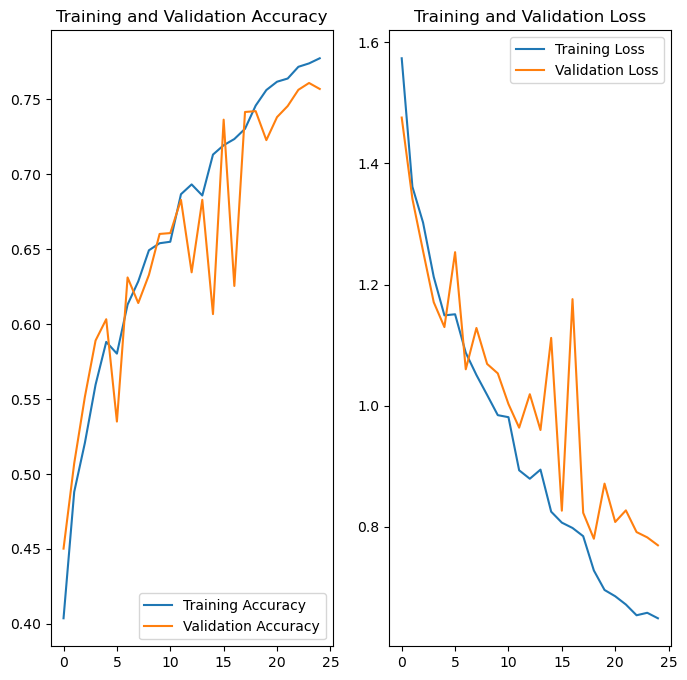

In [41]:
acc = history30.history['accuracy']
val_acc = history30.history['val_accuracy']

loss = history30.history['loss']
val_loss = history30.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
epochs = 27
## Your code goes here, use 30 epochs.
history20 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/27
220/220 [==============================] - 106s 481ms/step - loss: 0.6095 - accuracy: 0.7863 - val_loss: 0.7552 - val_accuracy: 0.7701
Epoch 2/27
220/220 [==============================] - 110s 498ms/step - loss: 0.5910 - accuracy: 0.7915 - val_loss: 0.7938 - val_accuracy: 0.7632
Epoch 3/27
220/220 [==============================] - 118s 531ms/step - loss: 0.5829 - accuracy: 0.7951 - val_loss: 0.7129 - val_accuracy: 0.7877
Epoch 4/27
220/220 [==============================] - 119s 539ms/step - loss: 0.5525 - accuracy: 0.8084 - val_loss: 0.8024 - val_accuracy: 0.7581
Epoch 5/27
220/220 [==============================] - 122s 553ms/step - loss: 0.5560 - accuracy: 0.8113 - val_loss: 0.7617 - val_accuracy: 0.7786
Epoch 6/27
220/220 [==============================] - 124s 561ms/step - loss: 0.5481 - accuracy: 0.8104 - val_loss: 0.9371 - val_accuracy: 0.7331
Epoch 7/27
220/220 [==============================] - 127s 576ms/step - loss: 0.5582 - accuracy: 0.8057 - val_loss: 0.8314 -

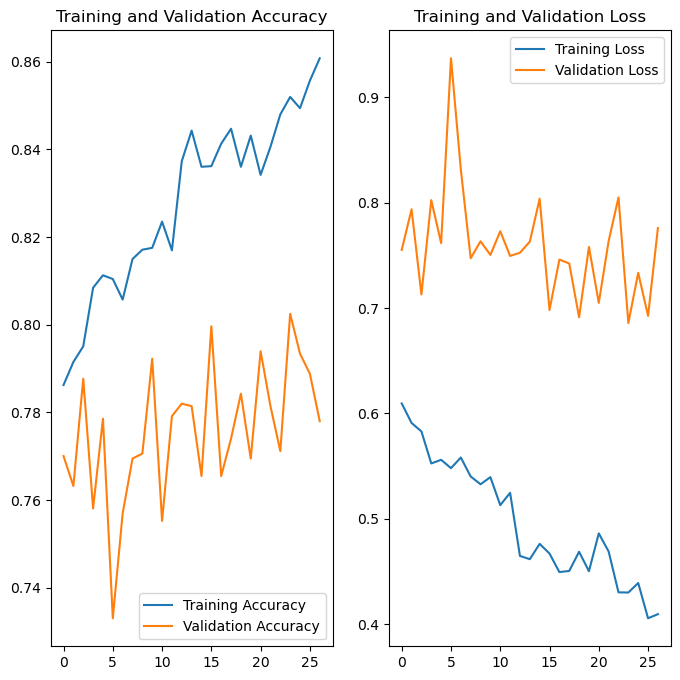

In [43]:
acc = history20.history['accuracy']
val_acc = history20.history['val_accuracy']

loss = history20.history['loss']
val_loss = history20.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
print(model)

### Analysis on Test Data

In [44]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [45]:
loss , accuracy = model.evaluate(test_ds)

4/4 [==============================] - 3s 71ms/step - loss: 6.5287 - accuracy: 0.4153


In [47]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.41525423526763916


### Prediction on New Test Data

In [48]:
melanoma_path = r"C:\Users\Karthik\Desktop\Upgrad\CNN_Assignment\CNN_assignment_new\Skin cancer ISIC The International Skin Imaging Collaboration\Test\vascular lesion\ISIC_0024370.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)

1/1 [==============================] - 0s 380ms/step
tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.6640952e-18 0.0000000e+00 0.0000000e+00 1.0000000e+00], shape=(9,), dtype=float32)


In [49]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to vascular lesion with a 100.00 percent confidence.
